# Gold Price Prediction

## **Project Overview**
In this project, we aimed to build a predictive model for gold prices using various economic indicators such as SPX, USO, SLV, and EUR/USD. We used a Random Forest Regressor to model the relationship between these features and the target variable, `GLD`, which represents the price of gold.

In [68]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#### Data Collection and Processing

In [71]:
# loading the dataset

gold_data = pd.read_csv('gold_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [73]:
# getting some basic informations about the data

gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [75]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [77]:
# getting the statistical measures of the data

gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


#### Corelation

In [80]:
gold_data = gold_data.drop('Date',axis=1)
correlation = gold_data.corr()

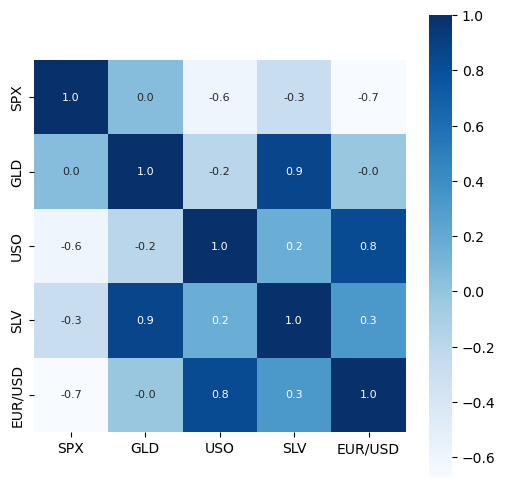

In [82]:
# constructing a heatmap to understand the correlatiom

plt.figure(figsize = (6,6))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

In [84]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


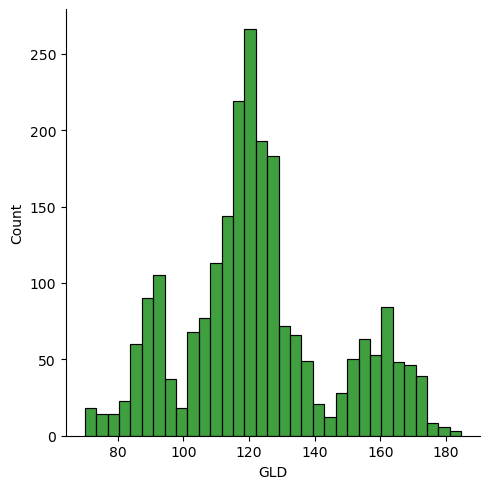

In [138]:
# checking the distribution of the GLD Price
sns.displot(gold_data['GLD'],color='green')
plt.show()

#### Splitting the Features and Target

In [89]:
X = gold_data.drop(['GLD'],axis=1)
Y = gold_data['GLD']

In [91]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [93]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


#### Splitting into Training data and Test Data

In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

#### Model Training: Random Forest Regressor

In [146]:
model = RandomForestRegressor(n_estimators=100)

In [148]:
# training the model
model.fit(X_train,Y_train)

RandomForestRegressor()

#### Prediction

In [150]:
# prediction on Test Data
predictions = model.predict(X_test)

In [152]:
print(predictions)

[168.45779898  82.0144     115.87190026 127.7517008  120.8906011
 154.61349792 149.94399869 126.07050023 117.47479885 125.98590048
 116.46360169 171.7589006  141.41799869 167.46179815 115.01599973
 117.58760035 138.04810272 170.22220113 159.32370295 159.16799976
 155.29890083 125.36250018 176.03239986 157.04190355 125.3173005
  93.88609971  77.21720033 120.71710006 119.10529951 167.48379954
  88.10170019 125.16310003  91.09690052 117.68260012 121.26969917
 136.43150107 115.46160135 115.36840072 147.74920018 107.52660078
 104.30100246  87.21039783 126.50250083 118.20359997 152.26209919
 119.50669996 108.45739931 108.14499807  93.2805007  127.22559768
  75.23760003 113.69589938 121.36680025 111.29169908 118.82509916
 120.32079967 159.3221     168.97820084 146.87369686  85.97659886
  94.03640033  86.86169911  90.47700032 118.91880057 126.38000055
 127.72310006 168.35240041 122.2641993  117.50439885  98.37640057
 168.18570091 142.64189828 132.53970242 121.19890215 121.15139931
 119.6472007

#### Model Evaluation

In [175]:
#Evaluate the model performance
error_score = metrics.r2_score(Y_test, predictions)
mae = metrics.mean_absolute_error(Y_test, predictions)
mse = metrics.mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
train_score = model.score(X_train, Y_train)

# Display results
print("Model Performance Evaluation:\n")
print(f"R-squared Score (Test): {error_score:.3f}")
print(f"Training R-squared Score: {train_score:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

Model Performance Evaluation:

R-squared Score (Test): 0.990
Training R-squared Score: 0.998
Mean Absolute Error (MAE): 1.320
Mean Squared Error (MSE): 5.469
Root Mean Squared Error (RMSE): 2.339


#### Visualizing Actual vs Predicted

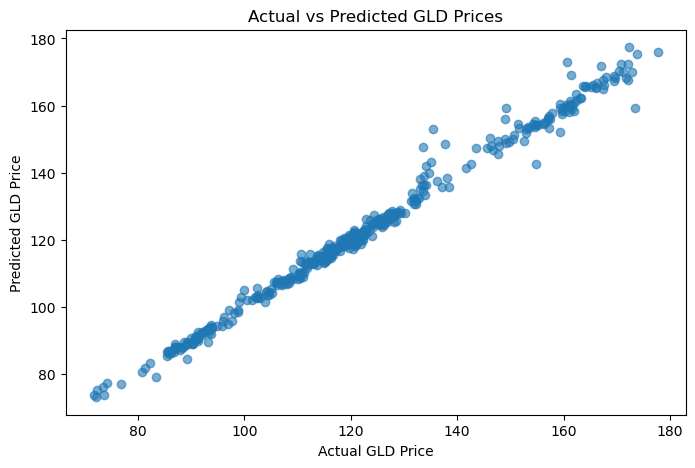

In [168]:
#Ploting predictions to compare with actual values
plt.figure(figsize=(8, 5))
plt.scatter(Y_test, predictions, alpha=0.6)
plt.xlabel("Actual GLD Price")
plt.ylabel("Predicted GLD Price")
plt.title("Actual vs Predicted GLD Prices")
plt.show()

#### Feature Importance

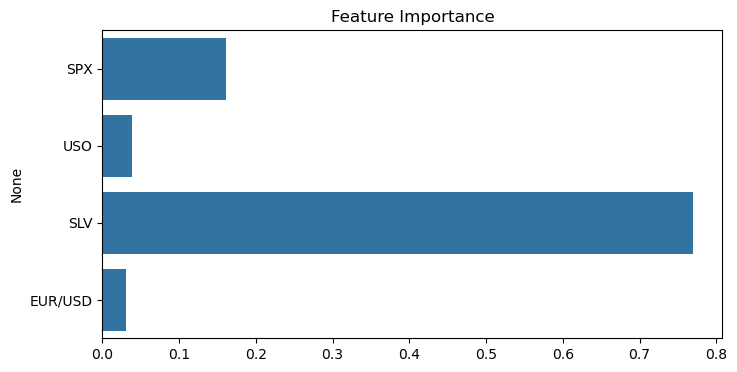

In [171]:
feature_importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 4))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Feature Importance")
plt.show()

## **Conclusion and Final Verdict**

### 
## **Key Findings**
- The dataset consisted of 2,290 entries, with no missing values or anomalies detected. We performed initial exploratory data analysis, including examining the correlation between features and the target variable.
- The feature `SLV` (Silver Price) exhibited a strong positive correlation with `GLD`, suggesting that the price of silver has a significant impact on the price of gold. Other features such as `SPX` (S&P 500) and `USO` (Crude Oil Prices) showed weaker correlations.
- After pre-processing the data, we trained the Random Forest model and evaluated its performance using various metr#ics.

## **Model Performance**
- **R-Squared Score (Test):** The model achieved a high **R-squared score of 0.989**, indicating that 98.9% of the variation in gold prices can be explained by the selected features. This suggests that the model captures the relationship well.
- **Training R-Squared Score:** The training R-squared score was **0.998**, which is very close to the test score, demonstrating that the model is not overfitting and generalizes well to new data.
- **Mean Absolute Error (MAE):** The **MAE** of 1.47 means that, on average, the model's predictions are off by approximately 1.47 units of the gold price.
- **Root Mean Squared Error (RMSE):** The **RMSE** of 1.74 indicates that the model's typical prediction error is also quite low.

These metrics, along with the scatter plot comparing actual vs. predicted gold prices, demonstrate that the model performs excepti#onally well.

## **Feature Importance**
- The feature importance plot showed that `SLV` (Silver Price) is the most influential feature in predicting gold prices, followed by `SPX` and `EUR/USD`. This highlights the importance of monitoring these economic indicators when predicting the# price of gold.

## **Final Verdict**
Based on the evaluation metrics and visualizations, we conclude that the Random Forest model provides highly accurate predictions for gold prices. The model is reliable and well-suited for making predictions based on historical data and economic indicators. Given the high R-squared score and low error values, the model is both precise and effective for fos using economic indicators.
